In [1]:
import pickle
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], ".."))
from modt.modt import MoDT
from modt._initialization import *
from modt.visualization import *
from modt.utility import *

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR

In [13]:
#data_input = pickle.load(open("../datasets/generated6_input.np", "rb"))
#data_target = pickle.load(open("../datasets/generated6_target.np", "rb"))
#data_input = pickle.load(open("../datasets/iris_input.pd", "rb"))
#data_target = pickle.load(open("../datasets/iris_target.pd", "rb"))
#data_input = pickle.load(open("../datasets/breast_cancer_input.np", "rb"))
#data_target = pickle.load(open("../datasets/breast_cancer_target.np", "rb"))
#data_input = pickle.load(open("../datasets/bank_input.pd", "rb"))  # Pd & Categoric features
#data_target = pickle.load(open("../datasets/bank_target.pd", "rb"))
#data_input = pickle.load(open("../datasets/banknote_input.pd", "rb"))  # Pd & numeric features
#data_target = pickle.load(open("../datasets/banknote_target.pd", "rb"))
#data_input = pickle.load(open("../datasets/cars_input.pd", "rb"))
#data_target = pickle.load(open("../datasets/cars_target.pd", "rb"))
data_input = pickle.load(open("../datasets/hrss_input.pd", "rb"))
data_target = pickle.load(open("../datasets/hrss_target.pd", "rb"))
parameters = {
    "X": data_input,
    "y": data_target,
    "n_experts": 3,
    "iterations": 100,
    "max_depth": 2,
    "init_learning_rate": 100,
    "learning_rate_decay": 0.995,
    "initialization_method": "random",
    "feature_names": None,
    "class_names": None,
    "use_2_dim_gate_based_on": "feature_importance_lda",
    "use_2_dim_clustering": False,
    "black_box_algorithm": None,
    "save_likelihood": True,
    }

parameters_fit = {
    "optimization_method": "ridge_regression",
    "early_stopping": False,
    "use_posterior": False,
    }

modt = MoDT(**parameters)
modt.fit(**parameters_fit)

Max depth: 2
Accuracy disjoint DTs: 0.7677310213575809
Min:  0.7625713681539438 Max:  0.7676887291182068


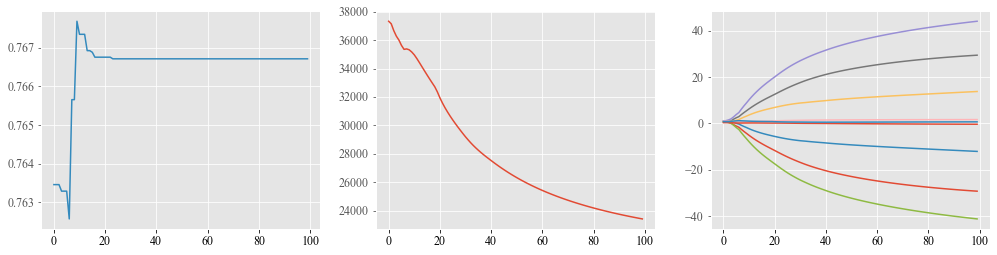

In [14]:
print("Max depth:",modt.max_depth)
print("Accuracy disjoint DTs:", modt.score_internal_disjoint())
fig = plt.gcf()
fig.set_size_inches(17,4)
plt.subplot(1, 3, 1)
accuracy_line(modt)
plt.subplot(1, 3, 2)
plt.plot(modt.all_likelihood)
plt.subplot(1, 3, 3)
theta_development(modt)

In [15]:
for depth in [1,2,3,4]:
    print("Depth: {} accuracy: {}".format(depth, tree_accuracy(modt.X,modt.y,depth)))

Depth: 1 accuracy: 0.7602030027489955
Depth: 2 accuracy: 0.763290336223303
Depth: 3 accuracy: 0.767773313596955
Depth: 4 accuracy: 0.7697610488475365


In [16]:
#fig = plt.gcf()
#fig.set_size_inches(5.8, 1.2)
#accuracy_line(modt)
#plt.savefig("output/accuracy.pdf", bbox_inches="tight")
#theta_development(modt)
#plt.savefig("output/theta.pdf", bbox_inches="tight")

In [17]:
#fig = plt.gcf()
#fig.set_size_inches(5.8, 1.2)
#plt.plot(modt.all_likelihood)
#plt.savefig("output/loss.pdf", bbox_inches="tight")

In [24]:
isinstance([1,2],list)

True

In [26]:
modt.X_top_2_mask

[17, 14, -1]

In [28]:
modt.X[:,[1,2]]

array([[-0.54351298, -0.56341438],
       [-0.54351298, -0.56341438],
       [-0.54351298, -0.56341438],
       ...,
       [-0.54351298, -0.56341438],
       [-0.54351298, -0.56341438],
       [-0.54351298, -0.56341438]])

C:\Users\Robert\Code\mixture-of-decision-trees\plotting\..\modt\visualization.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_x_ticks)
C:\Users\Robert\Code\mixture-of-decision-trees\plotting\..\modt\visualization.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_y_ticks)


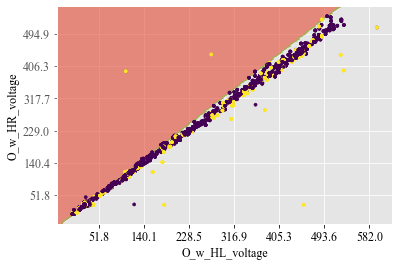

In [18]:
plot_gating(modt,iteration=modt.best_iteration,title=False,axis_digits=True,inverse_transform_standardization=True)

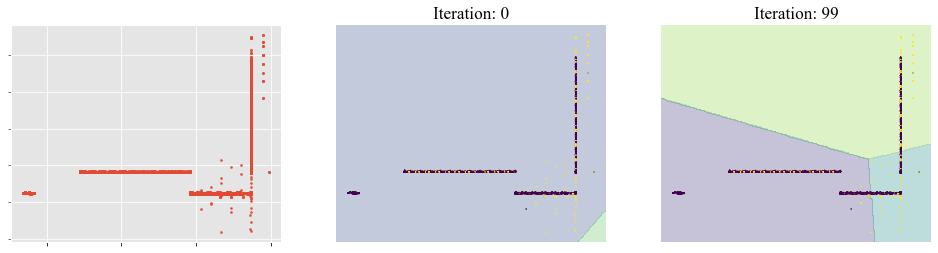

In [8]:
fig = plt.gcf()
fig.set_size_inches(16.5, 4)
plt.subplot(1, 3, 1)
plt.scatter(modt.X_2_dim[:,0],modt.X_2_dim[:,1],c=modt.init_labels,s=4)
ax = plt.gca()
#ax.spines['right'].set_color('black')
#ax.spines['left'].set_color('black')
#ax.spines['bottom'].set_color('black')
#ax.spines['top'].set_color('black')
ax.axis('tight')
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.subplot(1, 3, 2)
visualize_gating(modt,iteration=0, axis_ticks=True)
plt.subplot(1, 3, 3)
visualize_gating(modt,iteration=modt.completed_iterations, axis_ticks=True)

In [9]:
if parameters["X"].shape[1] == 2:
    fig = plt.gcf()
    fig.set_size_inches(17, 4)
    plt.subplot(1, 2, 1)
    visualize_gating(modt, iteration="best", low_alpha=False, axis_digits=True)
    plt.subplot(1, 2, 2)
    visualize_decision_area(modt.predict, modt.X_original, modt.y, enable_scatter=True, axis_digits=True)

[Text(167.4, 181.2, 'X[3] <= -302.0\ngini = 0.361\nsamples = 9830\nvalue = [7508, 2322]'),
 Text(83.7, 108.72, 'X[16] <= 4853.5\ngini = 0.47\nsamples = 5223\nvalue = [3251, 1972]'),
 Text(41.85, 36.23999999999998, 'gini = 0.366\nsamples = 1068\nvalue = [810, 258]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.485\nsamples = 4155\nvalue = [2441, 1714]'),
 Text(251.10000000000002, 108.72, 'X[13] <= 122.0\ngini = 0.14\nsamples = 4607\nvalue = [4257, 350]'),
 Text(209.25, 36.23999999999998, 'gini = 0.058\nsamples = 67\nvalue = [2, 65]'),
 Text(292.95, 36.23999999999998, 'gini = 0.118\nsamples = 4540\nvalue = [4255, 285]')]

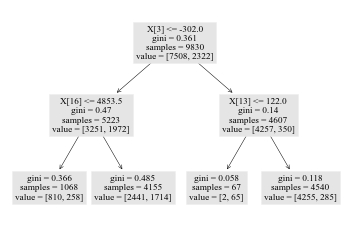

In [10]:
tree.plot_tree(modt.DT_experts_disjoint[0])

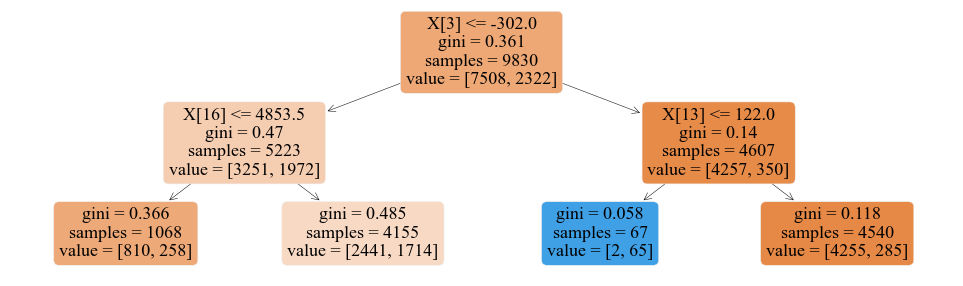

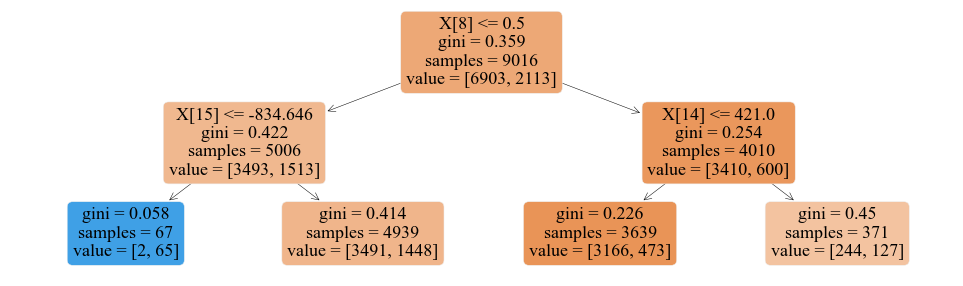

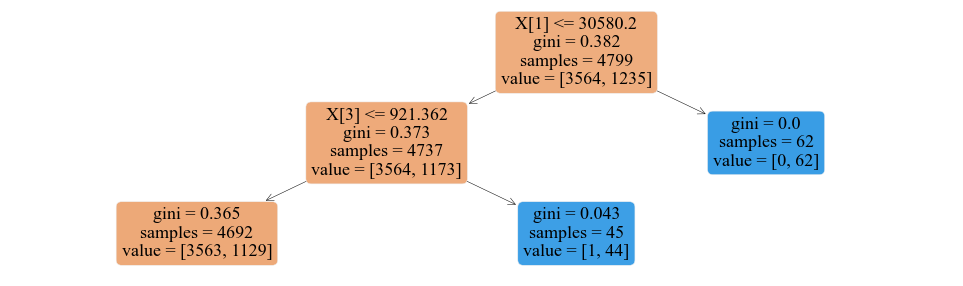

In [11]:
for expert in range(0,modt.n_experts):
    plot_disjoint_dt(modt,expert=expert,size=(17,5))

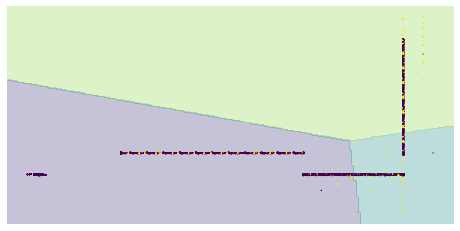

In [12]:
from celluloid import Camera
from IPython.display import HTML
fig = plt.figure(figsize=(8,4))

camera = Camera(fig)
for i in range(0,parameters["iterations"]): 
    visualize_gating(modt, iteration=i, low_alpha=False, title=False)
    #visualize_gating_animation(fig,modt.get_expert_iteration,modt.X,modt.y,i,low_alpha=False)
    camera.snap()
animation = camera.animate()

HTML(animation.to_html5_video())